In [3]:
import pykrige #biblioteca de geoestadística
import plotly.express as px #biblioteca de generación de gráficos
import pykrige.kriging_tools as kt #herramientas para exportar e importar archivos .asc con biblioteca PyKrige
from pykrige.ok import OrdinaryKriging #Kriging Ordinario con PyKrige
import pandas as pd #biblioteca de manipulación y análisis de datos
import numpy as np #biblioteca de funciones matemáticas
import matplotlib.pyplot as plt #biblioteca de generación de gráficos
plt.style.use('ggplot') #estilo para gráficos en matplotlib
%matplotlib inline 

In [14]:
carpeta = r"C:/Users/eduth/Desktop/Tarea 6/Grupo1/" #carpeta contenedora del archivo de inicio
#C:\Users\eduth\Desktop\Tarea 6\Grupo1
archivo = "dataset_grupo1_2D.xlsx" 

df = pd.read_excel('C:/Users/eduth/Desktop/Tarea 6/Grupo1/dataset_grupo1_2D.xlsx/') #lectura del archivo con Pandas

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [ ]:
df.head(20)

In [4]:
df.shape # 90 filas, 3 columnas (90 datos y 3 variables)

(90, 3)

In [5]:
DF = pd.read_excel(df)
DF

ValueError: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>

In [6]:
continuous = 'Ley [Cu %]'
flig=px.scatter(D3, x='Este [x]', y='Norte [y]', color=continuous, color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, D3[continuous].quantile(0.95)])
flig.update_traces(marker=dict(size=5.0))
flig.show()

NameError: name 'D3' is not defined

In [7]:
D3.describe()

NameError: name 'D3' is not defined

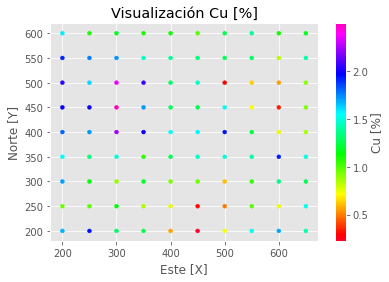

In [8]:
#variables convertidas a ndarray: Matriz Numpy

x = np.array([df["Este [x]"]])
y = np.array([df["Norte [y]"]])
cu = np.array([df["Ley [Cu %]"]])

#ploteo:

marker_size = 15
plt.scatter(x, y, marker_size, cu, cmap=plt.cm.gist_rainbow) #el estilo gist_rainbow es algo mas convencional.
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.title("Visualización Cu [%]")
cbar = plt.colorbar()
cbar.set_label("Cu [%]", labelpad=+1)
plt.show()

In [ ]:
#Variograma experimental y variograma teórico.
OK = OrdinaryKriging(x,y,cu, variogram_model='spherical', nlags=20, 
                     variogram_parameters= {'sill': 0.246, 'range': 210, 'nugget': 0}, enable_plotting=True, 
                     coordinates_type='euclidean')


#Ajuste del variograma experimental con un modelo esférico, 20 pasos, una meseta de 0.22 (lo cual es la varianza de los datos)
#, alcance de 175 metros y sin efecto pepita. 

In [6]:
#Se crean 46 celdas de 10 metros desde min() - max() del eje X.
grid_x = np.linspace(200, 660, num=46, endpoint=False) 
#Se crean 41 celdas de 10 metros desde min() - max() del eje Y.
grid_y = np.linspace(200, 610, num=41, endpoint=False) 

In [7]:
grid_x

array([200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
       310., 320., 330., 340., 350., 360., 370., 380., 390., 400., 410.,
       420., 430., 440., 450., 460., 470., 480., 490., 500., 510., 520.,
       530., 540., 550., 560., 570., 580., 590., 600., 610., 620., 630.,
       640., 650.])

In [8]:
grid_y

array([200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
       310., 320., 330., 340., 350., 360., 370., 380., 390., 400., 410.,
       420., 430., 440., 450., 460., 470., 480., 490., 500., 510., 520.,
       530., 540., 550., 560., 570., 580., 590., 600.])

In [9]:
z, ss = OK.execute('grid', grid_x, grid_y) # z es la leyde cobre y ss la varianza
plt.imshow(z)
cbar.set_label("Cu [%]", labelpad=+1)
plt.show()

NameError: name 'OK' is not defined

In [10]:
kt.write_asc_grid(grid_x, grid_y, z, filename="kriging_ordinario.asc") #Kriging Ordinario en forma de matriz

NameError: name 'z' is not defined

In [11]:
kt.write_asc_grid(grid_x, grid_y, ss, filename="kriging_ordinario_var.asc") #Varianza de estimación en forma de matriz

NameError: name 'ss' is not defined

In [12]:
ascvar = pd.read_csv(carpeta + "kriging_ordinario_var.asc", header=None, skiprows=7, sep="\s+") 
ascvar.shape #comprobar que sean 41 filas y 46 columnas
ascvar.to_csv("resultados_de_asc_var.csv",index=False)
ascvar

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.00,0.03,0.04,0.04,0.03,-0.00,0.03,0.04,0.04,0.03,...,0.03,0.04,0.04,0.03,-0.00,0.03,0.04,0.04,0.03,-0.00
1,0.03,0.04,0.05,0.05,0.04,0.03,0.04,0.05,0.05,0.04,...,0.04,0.05,0.05,0.04,0.03,0.04,0.05,0.05,0.04,0.03
2,0.04,0.05,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.05,0.04
3,0.04,0.05,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.05,0.04
4,0.03,0.04,0.05,0.05,0.04,0.03,0.04,0.05,0.05,0.04,...,0.04,0.05,0.05,0.04,0.03,0.04,0.05,0.05,0.04,0.03
5,-0.00,0.03,0.04,0.04,0.03,-0.00,0.03,0.04,0.04,0.03,...,0.03,0.04,0.04,0.03,-0.00,0.03,0.04,0.04,0.03,-0.00
6,0.03,0.04,0.05,0.05,0.04,0.03,0.04,0.05,0.05,0.04,...,0.04,0.05,0.05,0.04,0.03,0.04,0.05,0.05,0.04,0.03
7,0.04,0.05,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.05,0.04
8,0.04,0.05,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.05,0.04
9,0.03,0.04,0.05,0.05,0.04,0.03,0.04,0.05,0.05,0.04,...,0.04,0.05,0.05,0.04,0.03,0.04,0.05,0.05,0.04,0.03


In [13]:
asc = pd.read_csv(carpeta + "kriging_ordinario.asc", header=None, skiprows=7, sep="\s+") 
asc.shape #comprobar que sean 41 filas y 46 columnas
asc.to_csv("resultados_de_asc.csv",index=False)
asc

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.57,1.49,1.40,1.30,1.20,1.09,1.13,1.16,1.17,1.18,...,1.32,1.27,1.21,1.15,1.11,1.13,1.15,1.18,1.19,1.19
1,1.62,1.56,1.48,1.39,1.31,1.24,1.23,1.24,1.25,1.26,...,1.31,1.25,1.19,1.14,1.11,1.12,1.14,1.18,1.22,1.26
2,1.68,1.63,1.57,1.50,1.43,1.39,1.36,1.35,1.35,1.36,...,1.30,1.23,1.17,1.11,1.09,1.10,1.13,1.19,1.25,1.31
3,1.75,1.71,1.66,1.61,1.56,1.52,1.49,1.47,1.47,1.47,...,1.28,1.20,1.12,1.06,1.03,1.05,1.11,1.19,1.27,1.35
4,1.83,1.80,1.75,1.70,1.67,1.65,1.62,1.59,1.59,1.59,...,1.25,1.15,1.06,0.99,0.95,0.98,1.06,1.16,1.28,1.39
5,1.91,1.86,1.81,1.78,1.76,1.76,1.72,1.70,1.71,1.72,...,1.19,1.08,0.98,0.90,0.84,0.90,1.00,1.11,1.25,1.41
6,1.93,1.90,1.86,1.82,1.80,1.78,1.77,1.78,1.81,1.84,...,1.06,0.98,0.89,0.83,0.80,0.84,0.92,1.03,1.16,1.28
7,1.94,1.92,1.88,1.83,1.80,1.79,1.80,1.84,1.90,1.95,...,0.92,0.87,0.81,0.76,0.75,0.78,0.85,0.95,1.05,1.16
8,1.96,1.94,1.89,1.83,1.78,1.77,1.80,1.88,1.97,2.05,...,0.80,0.76,0.72,0.70,0.69,0.72,0.78,0.86,0.96,1.05
9,2.00,1.96,1.90,1.82,1.74,1.71,1.78,1.91,2.04,2.15,...,0.70,0.67,0.65,0.63,0.63,0.66,0.72,0.79,0.88,0.97


In [14]:
cu2 = np.array(asc) #Conversión pandas dataframe (dataframe tendremos los datos estructurados y 
                    #cada columna con su nombre correspondiente) a ndarray (arreglos multidimensionales 
                    #de alta eficiencia y diseñados para cálculo científico)
cu2

array([[1.57, 1.49, 1.4 , ..., 1.18, 1.19, 1.19],
       [1.62, 1.56, 1.48, ..., 1.18, 1.22, 1.26],
       [1.68, 1.63, 1.57, ..., 1.19, 1.25, 1.31],
       ...,
       [1.4 , 1.43, 1.46, ..., 1.43, 1.46, 1.46],
       [1.54, 1.57, 1.61, ..., 1.49, 1.47, 1.45],
       [1.67, 1.69, 1.72, ..., 1.53, 1.48, 1.42]])

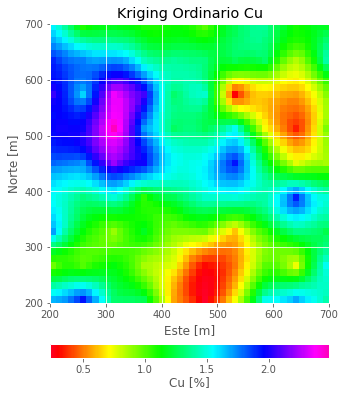

In [15]:
fig = plt.figure(figsize=(17,15))

plot1 = fig.add_subplot(131)
a = plt.imshow(cu2, cmap=plt.cm.gist_rainbow, extent=[200,700,200,700]) #gist_rainbow , vmin=1.5
plt.grid(True)
cbar = fig.colorbar(a, orientation='horizontal', pad=0.05)
cbar.set_label("Cu [%]", labelpad=+1)
plt.title('Kriging Ordinario Cu')
plt.xlabel('Este [m]')
plt.ylabel('Norte [m]')

plt.show()

In [5]:
type("H")
print(type("H"))

<class 'str'>
